In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

In [2]:
rftime = np.arange(150)
basin = ut.basin[:5]
ssp = ut.ssp
exp = ut.exp

In [3]:
tanom  = np.zeros((len(rftime),len(exp),len(basin)))

#Magnitude and time scale of response 

mag = [.7,1,.3,.6,.8] #degC
tsc = [30,50,100,60,50] #year

faclo = .1
fachi = .6

for b,bas in enumerate(basin):
    for e,ee in enumerate(exp[:5]):
        if b==e:
            fac = fachi
        else:
            fac = faclo
        tanom[:,e,b] = fac* mag[b]*(1-np.exp(-rftime/tsc[b]))

for b,bas in enumerate(basin):
    tanom[:,5,b] = np.sum(tanom[:,:4,b],axis=1)

tanom[:,6,:] = .5* tanom[:,5,:]
tanom[:,7,:] =  2* tanom[:,5,:]

In [7]:
fitctrl=False

In [8]:
ds = xr.open_dataset(f'../data/temperature_ann_ctrl.nc').isel(basin=slice(0,5))
tctrl = ds.temp
ds.close()

#Overwrite control with linear fit
if fitctrl:
    for b,bas in enumerate(basin):
        out = np.polyfit(rftime,tctrl[:,b],1)
        tctrl[:,b] = out[1] + rftime*out[0]

ds = xr.open_dataset(f'../data/temperature_ann_tot2.nc').isel(basin=slice(0,5))
yavail = len(ds.time)
print(yavail)
dtemp = ds.temp - tctrl[:yavail,:]
ds.close()

#Individual basin responses
for b,bas in enumerate(basin):
    for e,ee in enumerate(exp[:5]):
        if b==e:
            fac = fachi
        else:
            fac = faclo
        tanom[:yavail,e,b] = fac* dtemp.sel(basin=bas)

#TOTL
tanom[:yavail,5,:] = dtemp

#HALF and DOUB
tanom[:yavail,6,:] = .5* tanom[:yavail,5,:]
tanom[:yavail,7,:] =  2* tanom[:yavail,5,:]

91


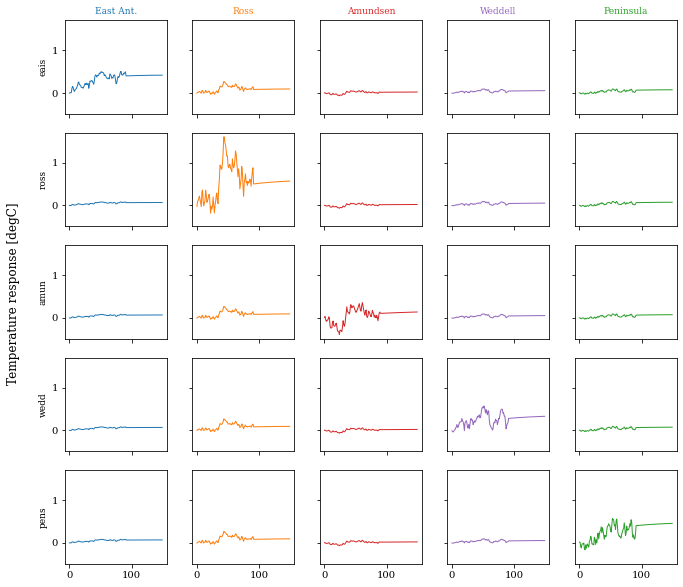

In [9]:
exp = exp[:5]

fig,ax = plt.subplots(len(exp),len(basin),sharex=True,sharey=True,figsize=(10,10))

for e,ee in enumerate(exp):
    for b,bas in enumerate(basin):
        ax[e,b].plot(rftime,tanom[:,e,b],c=ut.bcol[bas])
        ax[0,b].set_title(bas,c=ut.bcol[bas])
    ax[e,0].set_ylabel(ee)
        
fig.supylabel('Temperature response [degC]')
plt.show()